In [1]:
save2path = '../plots/'

In [2]:
from ico_classifier import ICOClassifier
from data_generators import DataGenerator
from metrics import mse
import torch
from tqdm.auto import tqdm
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [3]:
torch.cuda.is_available()

False

In [ ]:
dim = (20, 20)
mode = 'fixed'
M = 5
H_dist = {'dist': 'uniform', 'low': -10, 'high': 10}
res_dist = {'dist': 'normal', 'scale': 0.001}

data_generator = DataGenerator(mode, M=M, dim=dim, H_dist=H_dist, res_dist=res_dist)
train_size = 256
train_data = data_generator.generate(train_size)
test_size = 1000
test_data = data_generator.generate(test_size)

batch_size = 32
optimizer = 'adam'
optimizer_params = {'lr': 0.001}
hidden_size = 100
num_epochs = 20
model = ICOClassifier(dim, M, hidden_size=hidden_size, optimizer=optimizer,
                      optimizer_params=optimizer_params, logging_level='verbose')

history = model.train(train_data, num_epochs=num_epochs, batch_size=batch_size, test_data=test_data, logging_freq=1)

### Зависимость от размерности

In [ ]:
train_size = 256
test_size = 1000

mode = 'fixed'
M = 5
H_dist = {'dist': 'uniform', 'low': -10, 'high': 10}
res_dist = {'dist': 'normal', 'scale': 0.001}

batch_size = 32
optimizer = 'adam'
optimizer_params = {'lr': 0.001}
hidden_size = 100
num_epochs = 100

dim_list = [(10, 10), (25, 25), (50, 50), (75, 75)]
dim_stats = []
for dim in tqdm(dim_list):
    data_generator = DataGenerator(mode, M=M, dim=dim, H_dist=H_dist, res_dist=res_dist)
    train_data = data_generator.generate(train_size)
    test_data = data_generator.generate(test_size)
    
    model = ICOClassifier(dim, M, hidden_size=hidden_size, optimizer=optimizer,
                      optimizer_params=optimizer_params, logging_level=False)
    stat = model.train(train_data, num_epochs=num_epochs, batch_size=batch_size, test_data=test_data, logging_freq=1)
    stat['dim'] = dim
    dim_stats.append(stat)
    print(stat['train_loss'][-10:])

In [ ]:
# with open(save2path + '/adnn_dim', 'wb') as f:
#     pickle.dump(dim_stats, f)

In [32]:
with open(save2path + 'adnn_dim.pkl', 'rb') as f:
    dim_stats = pickle.load(f)

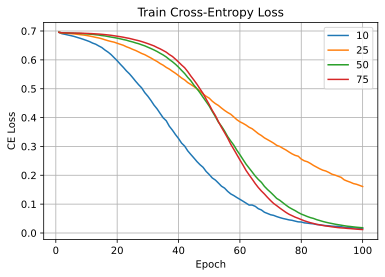

In [74]:
for stat in dim_stats:
    plt.plot(stat['epoch'], stat['train_loss'], label=stat['dim'][0])
plt.xlabel('Epoch')
plt.ylabel('CE Loss')
plt.grid()
plt.legend()
plt.title('Train Cross-Entropy Loss')
plt.savefig(save2path + 'adnn_dim_epoch_train_loss.pdf', bbox_inches='tight')
plt.show()

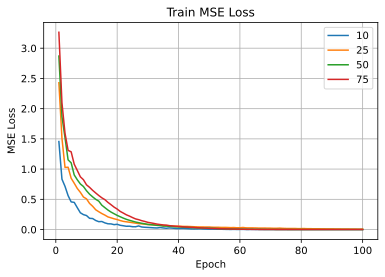

In [75]:
for stat in dim_stats:
    plt.plot(stat['epoch'], stat['train_mse'], label=stat['dim'][0])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid()
plt.legend()
plt.title('Train MSE Loss')
plt.savefig(save2path + 'adnn_dim_epoch_train_mse.pdf', bbox_inches='tight')
plt.show()

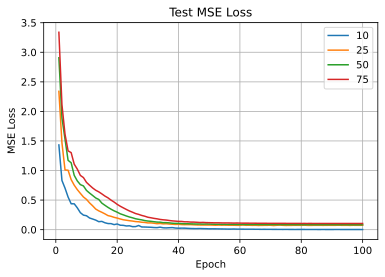

In [76]:
for stat in dim_stats:
    plt.plot(stat['epoch'], stat['test_mse'], label=stat['dim'][0])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid()
plt.legend()
plt.title('Test MSE Loss')
plt.savefig(save2path + 'adnn_dim_epoch_test_mse.pdf', bbox_inches='tight')
plt.show()

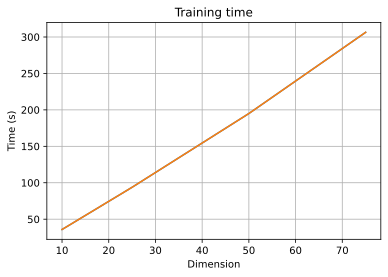

In [77]:
plt.plot([stat['dim'] for stat in dim_stats], [stat['time'][-1] for stat in dim_stats])
plt.xlabel('Dimension')
plt.ylabel('Time (s)')
plt.grid()
plt.title('Training time')
plt.savefig(save2path + '/adnn_time_dim.pdf', bbox_inches='tight')
plt.show()

### Зависимость от размера тренировочной выборки

In [ ]:
test_size = 1000

mode = 'fixed'
M = 5
H_dist = {'dist': 'uniform', 'low': -10, 'high': 10}
res_dist = {'dist': 'normal', 'scale': 0.001}

batch_size = 32
optimizer = 'adam'
optimizer_params = {'lr': 0.001}
hidden_size = 100

num_epochs_list = [100, 100, 100, 100, 100]
train_size_list = [16, 32, 64, 128, 256]
dim = (20, 20)
train_size_stats = []
for train_size, num_epochs in tqdm(list(zip(train_size_list, num_epochs_list))):
    data_generator = DataGenerator(mode, M=M, dim=dim, H_dist=H_dist, res_dist=res_dist)
    train_data = data_generator.generate(train_size)
    test_data = data_generator.generate(test_size)
    
    model = ICOClassifier(dim, M, hidden_size=hidden_size, optimizer=optimizer,
                      optimizer_params=optimizer_params, logging_level=False)
    stat = model.train(train_data, num_epochs=num_epochs, batch_size=batch_size, test_data=test_data)
    stat['train_size'] = train_size
    train_size_stats.append(stat)
    print(stat['train_loss'][-10:])

In [ ]:
# with open(save2path + '/adnn_train_size', 'wb') as f:
#     pickle.dump(train_size_stats, f)

In [5]:
with open(save2path + 'adnn_train_size.pkl', 'rb') as f:
    train_size_stats = pickle.load(f)

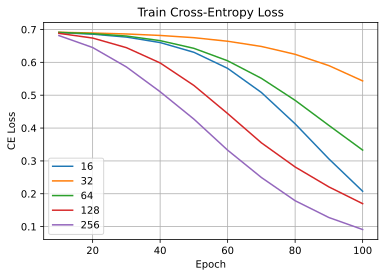

In [6]:
for stat in train_size_stats:
    plt.plot(stat['epoch'], stat['train_loss'], label=stat['train_size'])
plt.xlabel('Epoch')
plt.ylabel('CE Loss')
plt.grid()
plt.legend()
plt.title('Train Cross-Entropy Loss')
plt.savefig(save2path + 'adnn_train_size_epoch_train_loss.pdf', bbox_inches='tight')
plt.show()

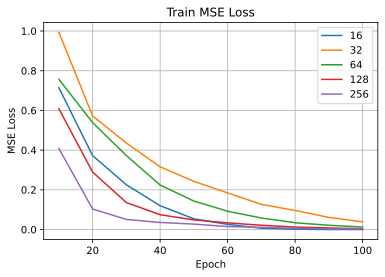

In [85]:
for stat in train_size_stats:
    plt.plot(stat['epoch'], stat['train_mse'], label=stat['train_size'])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid()
plt.legend()
plt.title('Train MSE Loss')
plt.savefig(save2path + 'adnn_train_size_epoch_train_mse.pdf', bbox_inches='tight')
plt.show()

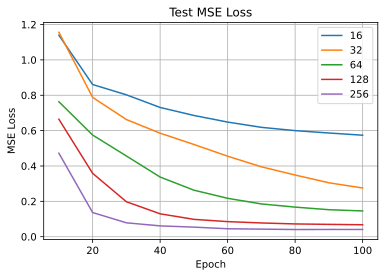

In [84]:
for stat in train_size_stats:
    plt.plot(stat['epoch'], stat['test_mse'], label=stat['train_size'])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid()
plt.legend()
plt.title('Test MSE Loss')
plt.savefig(save2path + 'adnn_train_size_epoch_test_mse.pdf', bbox_inches='tight')
plt.show()

### Зависимость от рамера множества значений

In [ ]:
train_size = 256
test_size = 1000

mode = 'fixed'
dim = (20, 20)
H_dist = {'dist': 'uniform', 'low': -10, 'high': 10}
res_dist = {'dist': 'normal', 'scale': 0.001}

batch_size = 32
optimizer = 'adam'
optimizer_params = {'lr': 0.001}
hidden_size = 100
num_epochs = 100

M_list = [5, 10, 25, 50]
# M_list = [50]
M_stats = []
for M in tqdm(M_list):
    data_generator = DataGenerator(mode, M=M, dim=dim, H_dist=H_dist, res_dist=res_dist)
    train_data = data_generator.generate(train_size)
    test_data = data_generator.generate(test_size)
    
    model = ICOClassifier(dim, M, hidden_size=hidden_size, optimizer=optimizer,
                      optimizer_params=optimizer_params, logging_level='verbose')
    stat = model.train(train_data, num_epochs=num_epochs, batch_size=batch_size, test_data=test_data, logging_freq=1)
    stat['M'] = M
    M_stats.append(stat)
    print(stat['train_loss'][-10:])

In [ ]:
# with open(save2path + '/adnn_M', 'wb') as f:
#     pickle.dump(M_stats, f)

In [42]:
with open(save2path + 'adnn_M.pkl', 'rb') as f:
    M_stats = pickle.load(f)

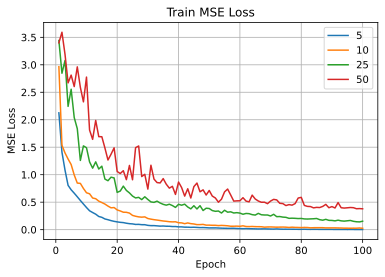

In [70]:
for stat in M_stats:
    plt.plot(stat['epoch'], stat['train_mse'], label=stat['M'])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid()
plt.legend()
plt.title('Train MSE Loss')
plt.savefig(save2path + '/adnn_M_epoch_train_mse.pdf', bbox_inches='tight')
plt.show()

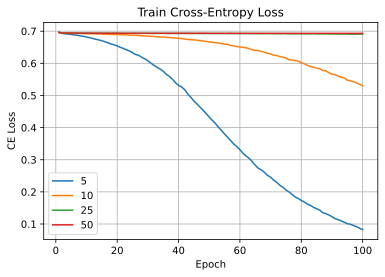

In [68]:
for stat in M_stats:
    plt.plot(stat['epoch'], stat['train_loss'], label=stat['M'])
plt.xlabel('Epoch')
plt.ylabel('CE Loss')
plt.grid()
plt.legend()
plt.title('Train Cross-Entropy Loss')
plt.savefig(save2path + '/adnn_M_epoch_train_loss.pdf', bbox_inches='tight')
plt.show()

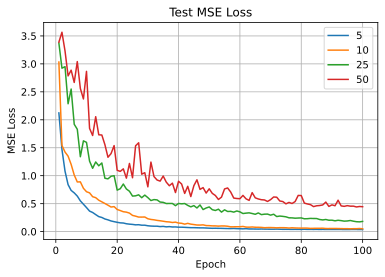

In [69]:
for stat in M_stats:
    plt.plot(stat['epoch'], stat['test_mse'], label=stat['M'])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid()
plt.legend()
plt.title('Test MSE Loss')
plt.savefig(save2path + '/adnn_M_epoch_test_mse.pdf', bbox_inches='tight')
plt.show()

### Обучение на различных матрицах $H$

In [7]:
dim = (10, 10)
mode = 'random'
M = 5
H_dist = {'dist': 'uniform', 'low': -10, 'high': 10}
res_dist = {'dist': 'normal', 'scale': 0.001}

data_generator = DataGenerator(mode, M=M, dim=dim, H_dist=H_dist, res_dist=res_dist)
train_size = 256
train_data = data_generator.generate(train_size)
test_size = 1000
test_data = data_generator.generate(test_size)

batch_size = 32
optimizer = 'adam'
optimizer_params = {'lr': 0.001}
hidden_size = 100
num_epochs = 20
model = ICOClassifier(dim, M, hidden_size=hidden_size, optimizer=optimizer,
                      optimizer_params=optimizer_params, logging_level='verbose')

history = model.train(train_data, num_epochs=num_epochs, batch_size=batch_size, test_data=test_data, logging_freq=1)

Epoch [1/20] Train CE Loss: 0.6961 Train MSE Loss: 3.9903 Test MSE Loss: 4.1504
Epoch [2/20] Train CE Loss: 0.6944 Train MSE Loss: 4.1331 Test MSE Loss: 4.1436
Epoch [3/20] Train CE Loss: 0.6941 Train MSE Loss: 4.1278 Test MSE Loss: 4.0988
Epoch [4/20] Train CE Loss: 0.6942 Train MSE Loss: 3.6953 Test MSE Loss: 4.1222
Epoch [5/20] Train CE Loss: 0.6938 Train MSE Loss: 3.8367 Test MSE Loss: 3.9972
Epoch [6/20] Train CE Loss: 0.6940 Train MSE Loss: 3.8856 Test MSE Loss: 4.0531
Epoch [7/20] Train CE Loss: 0.6939 Train MSE Loss: 3.7062 Test MSE Loss: 3.9655
Epoch [8/20] Train CE Loss: 0.6937 Train MSE Loss: 3.8543 Test MSE Loss: 4.0058
Epoch [9/20] Train CE Loss: 0.6939 Train MSE Loss: 3.8340 Test MSE Loss: 4.1567
Epoch [10/20] Train CE Loss: 0.6941 Train MSE Loss: 4.0178 Test MSE Loss: 4.1363
Epoch [11/20] Train CE Loss: 0.6937 Train MSE Loss: 3.4748 Test MSE Loss: 3.9739
Epoch [12/20] Train CE Loss: 0.6936 Train MSE Loss: 3.3801 Test MSE Loss: 3.9209
Epoch [13/20] Train CE Loss: 0.6937 T

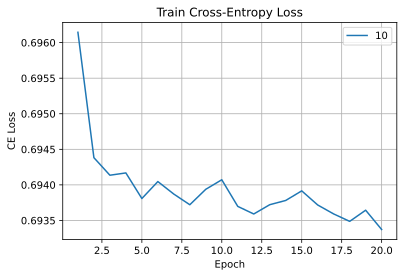

In [11]:
plt.plot(history['epoch'], history['train_loss'], label=10)
plt.xlabel('Epoch')
plt.ylabel('CE Loss')
plt.grid()
plt.legend()
plt.title('Train Cross-Entropy Loss')
plt.savefig(save2path + 'adnn_random_epoch_train_loss.pdf', bbox_inches='tight')
plt.show()

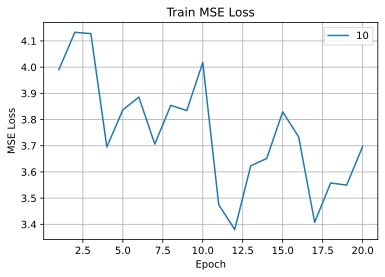

In [12]:
plt.plot(history['epoch'], history['train_mse'], label=10)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid()
plt.legend()
plt.title('Train MSE Loss')
plt.savefig(save2path + 'adnn_random_epoch_train_mse.pdf', bbox_inches='tight')
plt.show()

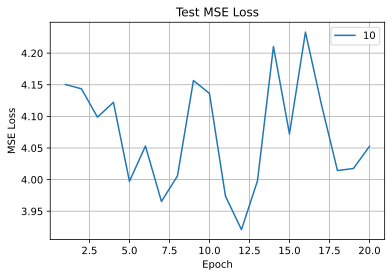

In [13]:
plt.plot(history['epoch'], history['test_mse'], label=10)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid()
plt.legend()
plt.title('Test MSE Loss')
plt.savefig(save2path + 'adnn_random_epoch_test_mse.pdf', bbox_inches='tight')
plt.show()